In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comparing my replicated logFC values to Blevins et al. 

### Ribo-Seq Up-regulated

In [12]:
ribo_up = pd.read_csv('/Users/scampione/Projects/Buck_Institute/Ribo_Profiling/PMID31358845/ribo_sig_genes_up.csv', header=0)
ribo_up = ribo_up[['genes', 'logFC']]

ref_ribo_up = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_RP_up (1).csv', header=0, delimiter=';')
ref_ribo_up['genes'] = [x.strip() for x in ref_ribo_up['rownames(up.genes.ribo.list)']]
ref_ribo_up = ref_ribo_up[['genes', 'logFC']]

merged_ribo_up = ribo_up.merge(ref_ribo_up, on='genes')

merged_ribo_up.columns = ['genes', 'my_logFC', 'BT_logFC']
merged_ribo_up

,genes,my_logFC,BT_logFC
0,CCW12,0.801327,0.571653
1,COS5,1.883890,1.668332
2,COS7,0.812251,0.907152
3,FEX1,1.246174,1.412946
4,HHF1,1.047028,0.723428
5,HHF2,1.024800,0.613590
6,MTC7,1.330661,1.403869
7,PAU24,0.989442,1.153022
8,PDC5,1.365760,0.921119
9,PIR1,0.790457,0.644989


In [28]:
merged_ribo_up['abs_diff'] =   abs(merged_ribo_up['BT_logFC'] - merged_ribo_up['my_logFC'])
merged_ribo_up.sort_values('abs_diff', ascending=True).head(30)

,genes,my_logFC,BT_logFC,abs_diff
6,MTC7,1.330661,1.403869,0.073208
11,XLOC_001468,1.490383,1.399543,0.090840
2,COS7,0.812251,0.907152,0.094901
16,YNL054W-B,0.957921,1.057849,0.099928
13,YCR102C,0.797152,0.662831,0.134321
9,PIR1,0.790457,0.644989,0.145468
7,PAU24,0.989442,1.153022,0.163580
3,FEX1,1.246174,1.412946,0.166772
15,YLR460C,0.864390,0.676368,0.188022
1,COS5,1.883890,1.668332,0.215558


In [30]:
filtered_ribo_up = merged_ribo_up[merged_ribo_up['genes'].isin(['MTC7', 'XLOC_001468', 'COS7', 'YNL054W-B', 'YCR102C', 'PAU24'])]
filtered_ribo_up[['genes',	'my_logFC', 'BT_logFC']]

,genes,my_logFC,BT_logFC
2,COS7,0.812251,0.907152
6,MTC7,1.330661,1.403869
7,PAU24,0.989442,1.153022
11,XLOC_001468,1.490383,1.399543
13,YCR102C,0.797152,0.662831
16,YNL054W-B,0.957921,1.057849


### Ribo-Seq Down-regulated

In [15]:
ribo_down = pd.read_csv('/Users/scampione/Projects/Buck_Institute/Ribo_Profiling/PMID31358845/ribo_sig_genes_down.csv', header=0)
ribo_down= ribo_down[['genes', 'logFC']]

In [16]:
ref_ribo_down = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_RP_down.csv', header=0, delimiter=';')
ref_ribo_down['genes'] = [x.strip() for x in ref_ribo_down['rownames(down.genes.ribo.list)']]
ref_ribo_down = ref_ribo_down[['genes', 'logFC']]

In [26]:
merged_ribo_down = ribo_down.merge(ref_ribo_down, on='genes')

merged_ribo_down.columns = ['genes', 'my_logFC', 'BT_logFC']
merged_ribo_down

,genes,my_logFC,BT_logFC
0,AAC1,-0.864200,-0.954866
1,AAD14,-1.214736,-1.465070
2,ACS1,-1.268068,-1.706146
3,ADH7,-1.660039,-1.421404
4,ARR2,-1.314301,-1.090480
...,...,...,...
229,YOR192C-B,-1.713016,-0.784892
230,YOS1,-0.951968,-0.810251
231,YPL071C,-1.067672,-0.982539
232,YPR145C-A,-1.815805,-1.861529


In [31]:
merged_ribo_down['abs_diff'] =   abs(merged_ribo_down['BT_logFC'] - merged_ribo_down['my_logFC'])
merged_ribo_down.sort_values('abs_diff', ascending=True).head(5)

,genes,my_logFC,BT_logFC,abs_diff
201,YCR101C,-1.198207,-1.197804,0.000403
79,RPS29B,-0.850655,-0.853908,0.003253
78,RPS29A,-1.098172,-1.104705,0.006532
187,XLOC_006009,-3.711431,-3.702780,0.008651
11,BLI1,-1.021265,-1.012379,0.008886


In [37]:
filtered_ribo_down = merged_ribo_down[merged_ribo_down['genes'].isin(['YCR101C', 'RPS29A', 'RPS29B', 'RPL41B', 'XLOC_006009', 'RPL41A'])]
filtered_ribo_down.drop(columns=['abs_diff'])

,genes,my_logFC,BT_logFC
73,RPL41A,-4.271289,-4.167954
74,RPL41B,-4.947364,-4.924877
78,RPS29A,-1.098172,-1.104705
79,RPS29B,-0.850655,-0.853908
187,XLOC_006009,-3.711431,-3.702780
201,YCR101C,-1.198207,-1.197804


### RNA-Seq Up-Regulated

In [46]:
rna_up = pd.read_csv('/Users/scampione/Projects/Buck_Institute/Ribo_Profiling/PMID31358845/rna_sig_genes_up.csv', header=0)
rna_up = rna_up[['genes', 'logFC']]

In [64]:
ref_rna_up = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_RNA_up (2).csv', header=0, delimiter=';')
ref_rna_up.columns
ref_rna_up['genes'] = [x.strip() for x in ref_rna_up['rownames(up.g.rna.cttable.list_0.05_fc_1.49)']]
ref_rna_up = ref_rna_up[['genes', 'logFC']]

merged_rna_up = rna_up.merge(ref_rna_up, on='genes')

merged_rna_up.columns = ['genes', 'my_logFC', 'BT_logFC']
merged_rna_up.head(5)

,genes,my_logFC,BT_logFC
0,AAT2,0.795250,0.793042
1,ABF2,0.788969,0.656262
2,ABP1,0.685429,0.704356
3,ACB1,1.203506,1.217200
4,ACP1,1.295243,1.197025


In [66]:
merged_rna_up['abs_diff'] =   abs(merged_rna_up['BT_logFC'] - merged_rna_up['my_logFC'])
merged_rna_up.sort_values('abs_diff', ascending=True).head(20)

,genes,my_logFC,BT_logFC,abs_diff
674,YCH1,0.606559,0.606564,0.000004
310,NIT3,0.879081,0.879030,0.000051
141,ERG13,0.750698,0.750636,0.000062
675,YCP4,0.915875,0.916071,0.000196
617,TRP2,0.761335,0.761004,0.000330
11,ADH3,0.698310,0.697873,0.000437
231,HTS1,0.627830,0.627310,0.000520
548,SHM1,0.885278,0.884736,0.000542
444,RPL40A,1.106270,1.106887,0.000617
187,GGC1,0.730899,0.731774,0.000875


In [67]:
filtered_rna_up = merged_rna_up[merged_rna_up['genes'].isin(['YCH1', 'NIT3', 'ERG13', 'RPL40A', 'COX4', 'SHM1'])]
filtered_rna_up.drop(columns=['abs_diff'])

,genes,my_logFC,BT_logFC
96,COX4,0.757762,0.758930
141,ERG13,0.750698,0.750636
310,NIT3,0.879081,0.879030
444,RPL40A,1.106270,1.106887
548,SHM1,0.885278,0.884736
674,YCH1,0.606559,0.606564


### RNA-Seq Down-Regulated

In [70]:
rna_down = pd.read_csv('/Users/scampione/Projects/Buck_Institute/Ribo_Profiling/PMID31358845/rna_sig_genes_down.csv', header=0)
rna_down = rna_down[['genes', 'logFC']]

In [72]:
ref_rna_down = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_RNA_down (1).csv', header=0, delimiter=';')
ref_rna_down['genes'] = [x.strip() for x in ref_rna_down['rownames(down.g.rna.cttable.list_0.05_fc_1.49)']]
ref_rna_down = ref_rna_down[['genes', 'logFC']]

merged_rna_down = rna_down.merge(ref_rna_down, on='genes')

merged_rna_down.columns = ['genes', 'my_logFC', 'BT_logFC']
merged_rna_down.head(5)

,genes,my_logFC,BT_logFC
0,AAD6,-1.378242,-1.297526
1,AAR2,-0.743593,-0.770314
2,AAT1,-0.947723,-1.189305
3,ACE2,-0.938483,-0.863635
4,ACM1,-1.082376,-1.020178


In [81]:
merged_rna_down['abs_diff'] =   abs(merged_rna_down['BT_logFC'] - merged_rna_down['my_logFC'])
merged_rna_down.sort_values('abs_diff', ascending=True).head(6)

,genes,my_logFC,BT_logFC,abs_diff
572,UBP9,-0.641371,-0.641485,0.000114
541,SYH1,-0.645431,-0.644963,0.000468
54,BUD4,-0.685260,-0.684778,0.000481
676,YNG2,-0.987961,-0.988668,0.000707
433,RRN6,-1.031656,-1.032448,0.000792
409,RGL1,-0.786302,-0.785471,0.000831


In [82]:
# filtered_rna_down = merged_rna_down[merged_rna_down['genes'].isin(['UBP9', 'SYH1', 'RRN6', 'COX10', 'ROX1', 'CAB3'])]
# filtered_rna_down.drop(columns=['abs_diff'])
merged_rna_down.sort_values('abs_diff', ascending=True).head(6).drop(columns=['abs_diff'])

,genes,my_logFC,BT_logFC
572,UBP9,-0.641371,-0.641485
541,SYH1,-0.645431,-0.644963
54,BUD4,-0.685260,-0.684778
676,YNG2,-0.987961,-0.988668
433,RRN6,-1.031656,-1.032448
409,RGL1,-0.786302,-0.785471


# Generating Table of Counts

In [2]:
Ribo_stress_rep1 = pd.read_csv('all_count_files/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']
Ribo_stress_rep1.head()

,ID,ribo_stress_rep1
0,15S_RRNA,3
1,21S_RRNA,0
2,AAC1,26
3,AAC3,582
4,AAD10,0


In [3]:
Ribo_stress_rep2 = pd.read_csv('all_count_files/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']
Ribo_stress_rep2.head()

,ID,ribo_stress_rep2
0,15S_RRNA,5
1,21S_RRNA,0
2,AAC1,24
3,AAC3,587
4,AAD10,0


In [4]:
Ribo_normal_rep1 = pd.read_csv('all_count_files/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']
Ribo_normal_rep1.head()

,ID,ribo_normal_rep1
0,15S_RRNA,43
1,21S_RRNA,0
2,AAC1,59
3,AAC3,613
4,AAD10,7


In [5]:
Ribo_normal_rep2 = pd.read_csv('all_count_files/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']
Ribo_normal_rep2.head()

,ID,ribo_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,0
2,AAC1,61
3,AAC3,609
4,AAD10,7


In [6]:
RNA_stress_rep1 = pd.read_csv('all_count_files/SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']
RNA_stress_rep1.head()

,ID,rna_stress_rep1
0,15S_RRNA,6
1,21S_RRNA,17
2,AAC1,90
3,AAC3,236
4,AAD10,142


In [7]:
RNA_stress_rep2 = pd.read_csv('all_count_files/SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']
RNA_stress_rep2.head()

,ID,rna_stress_rep2
0,15S_RRNA,4
1,21S_RRNA,2
2,AAC1,91
3,AAC3,318
4,AAD10,154


In [8]:
RNA_normal_rep1 = pd.read_csv('all_count_files/SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']
RNA_normal_rep1.head()

,ID,rna_normal_rep1
0,15S_RRNA,1
1,21S_RRNA,1
2,AAC1,131
3,AAC3,229
4,AAD10,270


In [9]:
RNA_normal_rep2 = pd.read_csv('all_count_files/SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']
RNA_normal_rep2.head()

,ID,rna_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,18
2,AAC1,110
3,AAC3,281
4,AAD10,296


In [19]:
# RFcontrolRep1	RFcontrolRep2	RFtreatedRep1	RFtreatedRep2	
ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')
ribo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [22]:
# RNAcontrolRep1	RNAcontrolRep2	RNAtreatedRep1	RNAtreatedRep2
rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')
rna_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7039 non-null   object
 1   rna_normal_rep1  7039 non-null   int64 
 2   rna_normal_rep2  7039 non-null   int64 
 3   rna_stress_rep1  7039 non-null   int64 
 4   rna_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [24]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
 5   rna_normal_rep1   7039 non-null   int64 
 6   rna_normal_rep2   7039 non-null   int64 
 7   rna_stress_rep1   7039 non-null   int64 
 8   rna_stress_rep2   7039 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 495.1+ KB


In [35]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)
all_merged_cleaned.head()

,ID,ribo_normal_rep1,ribo_normal_rep2,ribo_stress_rep1,ribo_stress_rep2,rna_normal_rep1,rna_normal_rep2,rna_stress_rep1,rna_stress_rep2
0,AAC1,59,61,26,24,131,110,90,91
1,AAC3,613,609,582,587,229,281,236,318
2,AAD10,7,7,0,0,270,296,142,154
3,AAD14,42,30,11,12,426,562,242,324
4,AAD15,0,0,0,0,17,14,11,6


In [53]:
all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']
print('     Replication: ')
all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]
all_merged_cleaned[all_merged_cleaned['ID'].isin(['AAC1','AAC3','AAD14','AAD4','AAD6',
                                                  'AAH1','AAP1','AAR2','AAT1','AAT2'])]

     Replication: 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,61,26,24,131,110,90,91
1,AAC3,613,609,582,587,229,281,236,318
3,AAD14,42,30,11,12,426,562,242,324
6,AAD4,17,15,8,8,427,567,243,324
7,AAD6,25,32,27,25,585,582,161,178
8,AAH1,2988,2781,2311,2172,1477,1632,1393,1580
9,AAP1,9139,8199,7770,7388,2104,2075,1844,2447
10,AAR2,360,315,208,193,189,174,76,87
11,AAT1,1234,1109,894,775,798,706,256,331
12,AAT2,20035,18069,12602,11907,8232,7202,8933,11247


In [55]:
all_merged_cleaned.head(15)

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,61,26,24,131,110,90,91
1,AAC3,613,609,582,587,229,281,236,318
2,AAD10,7,7,0,0,270,296,142,154
3,AAD14,42,30,11,12,426,562,242,324
4,AAD15,0,0,0,0,17,14,11,6
5,AAD3,0,1,0,0,285,261,194,272
6,AAD4,17,15,8,8,427,567,243,324
7,AAD6,25,32,27,25,585,582,161,178
8,AAH1,2988,2781,2311,2172,1477,1632,1393,1580
9,AAP1,9139,8199,7770,7388,2104,2075,1844,2447


In [2]:
BT_counts = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_tableofcounts (3).txt', delimiter='\t')
print('     Blevins et al. (2019): ')
BT_counts.head(12)

     Blevins et al. (2019): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,76,80,31,30,206,178,115,165
1,AAC3,950,964,842,801,418,516,428,524
2,AAD14,61,46,13,16,557,683,298,414
3,AAD4,22,22,11,13,537,691,326,458
4,AAD6,44,52,40,31,615,636,187,210
5,AAH1,4525,4240,3315,3109,1948,2098,1912,2139
6,AAP1,13830,12361,11437,10880,4005,3904,3364,4237
7,AAR2,539,474,300,256,353,313,126,178
8,AAT1,1812,1614,1284,1138,1314,1269,411,472
9,AAT2,30446,27388,22359,21336,10753,9470,12208,15077


# Generating Table of Counts 
(threshold of 1)

In [6]:
Ribo_stress_rep1 = pd.read_csv('all_count_files/quality_threshold_1_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']
Ribo_stress_rep1.head()

,ID,ribo_stress_rep1
0,15S_RRNA,3
1,21S_RRNA,0
2,AAC1,26
3,AAC3,588
4,AAD10,0


In [7]:
Ribo_stress_rep2 = pd.read_csv('all_count_files/quality_threshold_1_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']
Ribo_stress_rep2.head()

,ID,ribo_stress_rep2
0,15S_RRNA,5
1,21S_RRNA,0
2,AAC1,24
3,AAC3,593
4,AAD10,0


In [8]:
Ribo_normal_rep1 = pd.read_csv('all_count_files/quality_threshold_1_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']
Ribo_normal_rep1.head()

,ID,ribo_normal_rep1
0,15S_RRNA,43
1,21S_RRNA,0
2,AAC1,59
3,AAC3,614
4,AAD10,7


In [9]:
Ribo_normal_rep2 = pd.read_csv('all_count_files/quality_threshold_1_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']
Ribo_normal_rep2.head()

,ID,ribo_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,0
2,AAC1,62
3,AAC3,619
4,AAD10,9


In [10]:
RNA_stress_rep1 = pd.read_csv('all_count_files/SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']
RNA_stress_rep1.head()

,ID,rna_stress_rep1
0,15S_RRNA,6
1,21S_RRNA,17
2,AAC1,90
3,AAC3,236
4,AAD10,142


In [11]:
RNA_stress_rep2 = pd.read_csv('all_count_files/SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']
RNA_stress_rep2.head()

,ID,rna_stress_rep2
0,15S_RRNA,4
1,21S_RRNA,2
2,AAC1,91
3,AAC3,318
4,AAD10,154


In [12]:
RNA_normal_rep1 = pd.read_csv('all_count_files/SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']
RNA_normal_rep1.head()

,ID,rna_normal_rep1
0,15S_RRNA,1
1,21S_RRNA,1
2,AAC1,131
3,AAC3,229
4,AAD10,270


In [13]:
RNA_normal_rep2 = pd.read_csv('all_count_files/SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']
RNA_normal_rep2.head()

,ID,rna_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,18
2,AAC1,110
3,AAC3,281
4,AAD10,296


In [14]:
# RFcontrolRep1	RFcontrolRep2	RFtreatedRep1	RFtreatedRep2	
ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')
ribo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [15]:
# RNAcontrolRep1	RNAcontrolRep2	RNAtreatedRep1	RNAtreatedRep2
rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')
rna_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7039 non-null   object
 1   rna_normal_rep1  7039 non-null   int64 
 2   rna_normal_rep2  7039 non-null   int64 
 3   rna_stress_rep1  7039 non-null   int64 
 4   rna_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [16]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
 5   rna_normal_rep1   7039 non-null   int64 
 6   rna_normal_rep2   7039 non-null   int64 
 7   rna_stress_rep1   7039 non-null   int64 
 8   rna_stress_rep2   7039 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 495.1+ KB


In [17]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)
all_merged_cleaned.head()

,ID,ribo_normal_rep1,ribo_normal_rep2,ribo_stress_rep1,ribo_stress_rep2,rna_normal_rep1,rna_normal_rep2,rna_stress_rep1,rna_stress_rep2
0,AAC1,59,62,26,24,131,110,90,91
1,AAC3,614,619,588,593,229,281,236,318
2,AAD10,7,9,0,0,270,296,142,154
3,AAD14,47,41,14,15,426,562,242,324
4,AAD15,1,2,0,0,17,14,11,6


In [20]:
all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']
print('     Replication (lower threshold): ')
all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]
all_merged_cleaned[all_merged_cleaned['ID'].isin(['AAC1','AAC3','AAD14','AAD4','AAD6',
                                                  'AAH1','AAP1','AAR2','AAT1','AAT2'])]

     Replication (lower threshold): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,62,26,24,131,110,90,91
1,AAC3,614,619,588,593,229,281,236,318
3,AAD14,47,41,14,15,426,562,242,324
6,AAD4,24,20,10,8,427,567,243,324
7,AAD6,33,34,28,27,585,582,161,178
8,AAH1,2995,2812,2322,2195,1477,1632,1393,1580
9,AAP1,9175,8288,7852,7490,2104,2075,1844,2447
10,AAR2,362,318,209,195,189,174,76,87
11,AAT1,1236,1123,902,790,798,706,256,331
12,AAT2,20114,18253,12711,12009,8232,7202,8933,11247


# Generating Table of Counts 
(threshold of 0)

In [21]:
Ribo_stress_rep1 = pd.read_csv('all_count_files/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']
Ribo_stress_rep1.head()

,ID,ribo_stress_rep1
0,15S_RRNA,3
1,21S_RRNA,0
2,AAC1,26
3,AAC3,595
4,AAD10,0


In [22]:
Ribo_stress_rep2 = pd.read_csv('all_count_files/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']
Ribo_stress_rep2.head()

,ID,ribo_stress_rep2
0,15S_RRNA,5
1,21S_RRNA,0
2,AAC1,24
3,AAC3,599
4,AAD10,0


In [23]:
Ribo_normal_rep1 = pd.read_csv('all_count_files/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']
Ribo_normal_rep1.head()

,ID,ribo_normal_rep1
0,15S_RRNA,44
1,21S_RRNA,0
2,AAC1,59
3,AAC3,616
4,AAD10,7


In [24]:
Ribo_normal_rep2 = pd.read_csv('all_count_files/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']
Ribo_normal_rep2.head()

,ID,ribo_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,0
2,AAC1,63
3,AAC3,629
4,AAD10,9


In [25]:
RNA_stress_rep1 = pd.read_csv('all_count_files/SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']
RNA_stress_rep1.head()

,ID,rna_stress_rep1
0,15S_RRNA,6
1,21S_RRNA,17
2,AAC1,90
3,AAC3,236
4,AAD10,142


In [26]:
RNA_stress_rep2 = pd.read_csv('all_count_files/SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']
RNA_stress_rep2.head()

,ID,rna_stress_rep2
0,15S_RRNA,4
1,21S_RRNA,2
2,AAC1,91
3,AAC3,318
4,AAD10,154


In [27]:
RNA_normal_rep1 = pd.read_csv('all_count_files/SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']
RNA_normal_rep1.head()

,ID,rna_normal_rep1
0,15S_RRNA,1
1,21S_RRNA,1
2,AAC1,131
3,AAC3,229
4,AAD10,270


In [28]:
RNA_normal_rep2 = pd.read_csv('all_count_files/SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']
RNA_normal_rep2.head()

,ID,rna_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,18
2,AAC1,110
3,AAC3,281
4,AAD10,296


In [29]:
# RFcontrolRep1	RFcontrolRep2	RFtreatedRep1	RFtreatedRep2	
ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')
ribo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [30]:
# RNAcontrolRep1	RNAcontrolRep2	RNAtreatedRep1	RNAtreatedRep2
rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')
rna_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7039 non-null   object
 1   rna_normal_rep1  7039 non-null   int64 
 2   rna_normal_rep2  7039 non-null   int64 
 3   rna_stress_rep1  7039 non-null   int64 
 4   rna_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [31]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
 5   rna_normal_rep1   7039 non-null   int64 
 6   rna_normal_rep2   7039 non-null   int64 
 7   rna_stress_rep1   7039 non-null   int64 
 8   rna_stress_rep2   7039 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 495.1+ KB


In [32]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)
all_merged_cleaned.head()

,ID,ribo_normal_rep1,ribo_normal_rep2,ribo_stress_rep1,ribo_stress_rep2,rna_normal_rep1,rna_normal_rep2,rna_stress_rep1,rna_stress_rep2
0,AAC1,59,63,26,24,131,110,90,91
1,AAC3,616,629,595,599,229,281,236,318
2,AAD10,7,9,0,0,270,296,142,154
3,AAD14,47,42,14,16,426,562,242,324
4,AAD15,1,2,0,0,17,14,11,6


In [34]:
all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']
print('     Replication (threshold 0): ')
all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]
all_merged_cleaned[all_merged_cleaned['ID'].isin(['AAC1','AAC3','AAD14','AAD4','AAD6',
                                                  'AAH1','AAP1','AAR2','AAT1','AAT2'])]

     Replication (threshold 0): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,63,26,24,131,110,90,91
1,AAC3,616,629,595,599,229,281,236,318
3,AAD14,47,42,14,16,426,562,242,324
6,AAD4,24,21,10,8,427,567,243,324
7,AAD6,33,35,28,27,585,582,161,178
8,AAH1,3009,2860,2362,2229,1477,1632,1393,1580
9,AAP1,9221,8460,7956,7596,2104,2075,1844,2447
10,AAR2,366,327,209,197,189,174,76,87
11,AAT1,1240,1137,919,800,798,706,256,331
12,AAT2,20214,18562,12902,12205,8232,7202,8933,11247


# Generating Table of Counts 
(threshold of 0, mode = union)

In [455]:
Ribo_stress_rep1 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']
Ribo_stress_rep1.head()

,ID,ribo_stress_rep1
0,15S_RRNA,3
1,21S_RRNA,0
2,AAC1,27
3,AAC3,621
4,AAD10,0


In [456]:
Ribo_stress_rep2 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']
Ribo_stress_rep2.head()

,ID,ribo_stress_rep2
0,15S_RRNA,5
1,21S_RRNA,0
2,AAC1,24
3,AAC3,630
4,AAD10,0


In [457]:
Ribo_normal_rep1 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']
Ribo_normal_rep1.head()

,ID,ribo_normal_rep1
0,15S_RRNA,44
1,21S_RRNA,0
2,AAC1,60
3,AAC3,666
4,AAD10,7


In [458]:
Ribo_normal_rep2 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']
Ribo_normal_rep2.head()

,ID,ribo_normal_rep2
0,15S_RRNA,4
1,21S_RRNA,0
2,AAC1,67
3,AAC3,706
4,AAD10,9


In [459]:
RNA_stress_rep1 = pd.read_csv('all_count_files/union_thesh_0_SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']
RNA_stress_rep1.head()

,ID,rna_stress_rep1
0,15S_RRNA,6
1,21S_RRNA,18
2,AAC1,104
3,AAC3,276
4,AAD10,153


In [460]:
RNA_stress_rep2 = pd.read_csv('all_count_files/union_thesh_0_SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']
RNA_stress_rep2.head()

,ID,rna_stress_rep2
0,15S_RRNA,4
1,21S_RRNA,2
2,AAC1,122
3,AAC3,375
4,AAD10,180


In [461]:
RNA_normal_rep1 = pd.read_csv('all_count_files/union_thesh_0_SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']
RNA_normal_rep1.head()

,ID,rna_normal_rep1
0,15S_RRNA,1
1,21S_RRNA,1
2,AAC1,153
3,AAC3,279
4,AAD10,295


In [462]:
RNA_normal_rep2 = pd.read_csv('all_count_files/union_thesh_0_SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']
RNA_normal_rep2.head()

,ID,rna_normal_rep2
0,15S_RRNA,5
1,21S_RRNA,19
2,AAC1,135
3,AAC3,325
4,AAD10,325


In [463]:
# RFcontrolRep1	RFcontrolRep2	RFtreatedRep1	RFtreatedRep2	
ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')
ribo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [464]:
# RNAcontrolRep1	RNAcontrolRep2	RNAtreatedRep1	RNAtreatedRep2
rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')
rna_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7039 non-null   object
 1   rna_normal_rep1  7039 non-null   int64 
 2   rna_normal_rep2  7039 non-null   int64 
 3   rna_stress_rep1  7039 non-null   int64 
 4   rna_stress_rep2  7039 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.1+ KB


In [465]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7039 non-null   object
 1   ribo_normal_rep1  7039 non-null   int64 
 2   ribo_normal_rep2  7039 non-null   int64 
 3   ribo_stress_rep1  7039 non-null   int64 
 4   ribo_stress_rep2  7039 non-null   int64 
 5   rna_normal_rep1   7039 non-null   int64 
 6   rna_normal_rep2   7039 non-null   int64 
 7   rna_stress_rep1   7039 non-null   int64 
 8   rna_stress_rep2   7039 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 495.1+ KB


In [466]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)
all_merged_cleaned.head()

,ID,ribo_normal_rep1,ribo_normal_rep2,ribo_stress_rep1,ribo_stress_rep2,rna_normal_rep1,rna_normal_rep2,rna_stress_rep1,rna_stress_rep2
0,AAC1,60,67,27,24,153,135,104,122
1,AAC3,666,706,621,630,279,325,276,375
2,AAD10,7,9,0,0,295,325,153,180
3,AAD14,49,44,14,16,545,703,286,390
4,AAD15,2,3,0,0,69,52,42,44


ID                  AAC1 AAC3 AAD10 AAD14 AAD15 AAD3 AAD4 AAD6 AAH...
ribo_normal_rep1                                             33663991
ribo_normal_rep2                                             31902877
ribo_stress_rep1                                             28798085
ribo_stress_rep2                                             28544324
rna_normal_rep1                                              11954307
rna_normal_rep2                                              12627044
rna_stress_rep1                                              11109986
rna_stress_rep2                                              14162002
dtype: object

In [16]:
all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']
print('     Replication (threshold 0, overlap mode = union): ')
all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]
all_merged_cleaned[all_merged_cleaned['ID'].isin(['AAC1','AAC3','AAD14','AAD4','AAD6',
                                                  'AAH1','AAP1','AAR2','AAT1','AAT2'])]

     Replication (threshold 0, overlap mode = union): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,60,67,27,24,153,135,104,122
1,AAC3,666,706,621,630,279,325,276,375
3,AAD14,49,44,14,16,545,703,286,390
6,AAD4,29,30,12,8,584,750,322,424
7,AAD6,35,39,29,27,646,662,185,209
8,AAH1,3100,2936,2398,2263,1624,1779,1527,1778
9,AAP1,9398,8648,7986,7623,2649,2716,2407,3122
10,AAR2,411,366,213,201,229,221,93,104
11,AAT1,1409,1246,923,803,939,904,288,383
12,AAT2,21006,19541,13218,12457,8983,7789,9660,12170


# Comparison of Replication and Blevins et al. (2019) CPM

## Parameters: intersection-strict, min quality 10

In [3]:
Ribo_stress_rep1 = pd.read_csv('all_count_files_strict/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']

Ribo_stress_rep2 = pd.read_csv('all_count_files_strict/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']

Ribo_normal_rep1 = pd.read_csv('all_count_files_strict/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']

Ribo_normal_rep2 = pd.read_csv('all_count_files_strict/yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']

ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')

In [4]:
RNA_stress_rep1 = pd.read_csv('all_count_files_strict/SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']

RNA_stress_rep2 = pd.read_csv('all_count_files_strict/SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']

RNA_normal_rep1 = pd.read_csv('all_count_files_strict/SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']

RNA_normal_rep2 = pd.read_csv('all_count_files_strict/SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']

rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')

In [5]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')

In [6]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)

all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]

all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2',
                                    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']

all_merged_cleaned.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,61,26,24,131,110,90,91
1,AAC3,613,609,582,587,229,281,236,318
2,AAD10,7,7,0,0,270,296,142,154
3,AAD14,42,30,11,12,426,562,242,324
4,AAD15,0,0,0,0,17,14,11,6


In [7]:
BT_counts = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_tableofcounts (3).txt', delimiter='\t')
print('     Blevins et al. (2019): ')
BT_counts['ID'] = [x.strip() for x in BT_counts['ID']]

BT_counts.head()

     Blevins et al. (2019): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,76,80,31,30,206,178,115,165
1,AAC3,950,964,842,801,418,516,428,524
2,AAD14,61,46,13,16,557,683,298,414
3,AAD4,22,22,11,13,537,691,326,458
4,AAD6,44,52,40,31,615,636,187,210


In [8]:
BT_counts.sum(axis=0)

ID                AAC1AAC3AAD14AAD4AAD6AAH1AAP1AAR2AAT1AAT2ABD1A...
RFcontrolRep1                                              36244107
RFcontrolRep2                                              34423447
RFtreatedRep1                                              31767841
RFtreatedRep2                                              31177590
RNAcontrolRep1                                             13321273
RNAcontrolRep2                                             13849389
RNAtreatedRep1                                             11945746
RNAtreatedRep2                                             15308609
dtype: object

In [9]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              24261046
RFcontrolRep2                                              22918639
RFtreatedRep1                                              21463256
RFtreatedRep2                                              21062959
RNAcontrolRep1                                              9076386
RNAcontrolRep2                                              9470230
RNAtreatedRep1                                              8131873
RNAtreatedRep2                                             10544619
dtype: object

In [10]:
print(len(all_merged_cleaned['ID']))
print(len(BT_counts['ID']))

7032
5419


In [11]:
print(len(all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])]))

subset_all_merged_cleaned = all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])].reset_index()

5419


In [12]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              24261046
RFcontrolRep2                                              22918639
RFtreatedRep1                                              21463256
RFtreatedRep2                                              21062959
RNAcontrolRep1                                              9076386
RNAcontrolRep2                                              9470230
RNAtreatedRep1                                              8131873
RNAtreatedRep2                                             10544619
dtype: object

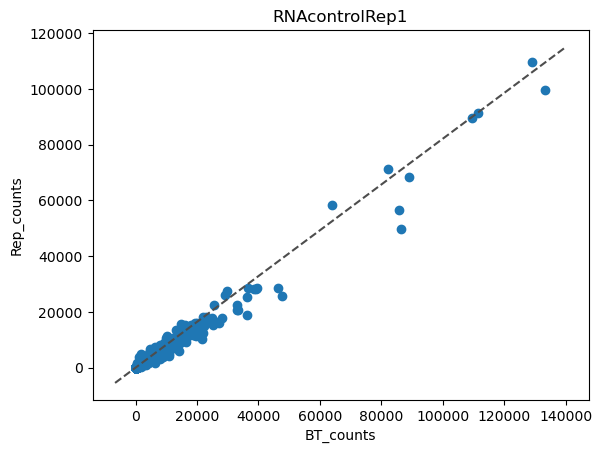

In [13]:
conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


for cond in conditions:
    plt.scatter(BT_counts[cond], subset_all_merged_cleaned[cond])
    
    plt.xlabel('BT_counts')
    plt.ylabel("Rep_counts")
    plt.title(cond)
    
    plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
    
    plt.show()
    
    break

In [14]:
def calculate_log2_cpm(df):
    # Sum the counts for each sample (column-wise)
    total_counts = df.sum(axis=0)
    
    # Calculate CPM
    cpm = (df / total_counts) * 1e6
    
    # Replace any zeroes with a small value to avoid log(0)
    cpm.replace(0, 1e-10, inplace=True)
    
    # Calculate the log2 CPM
    log2_cpm = np.log2(cpm)
    
    return log2_cpm


# Sum the counts for each sample (column-wise)
# Calculate CPM
# Calculate the log2 CPM



In [15]:
cpm_bt = calculate_log2_cpm(BT_counts.set_index('ID')).reset_index()

In [16]:
cpm_bt.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,1.068253,1.216608,-0.035299,-0.055547,3.950840,3.683983,3.267065,3.430051
1,AAC3,4.712109,4.807570,4.728181,4.683221,4.971699,5.219477,5.163042,5.097152
2,AAD14,0.751063,0.418242,-1.289055,-0.962438,5.385873,5.623991,4.640743,4.757216
3,AAD4,-0.720243,-0.645888,-1.530064,-1.261998,5.333118,5.640791,4.770303,4.902932
4,AAD6,0.279757,0.595120,0.332433,-0.008241,5.528783,5.521133,3.968469,3.777974


In [17]:
cpm_bt.columns

Index(['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1',
       'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1',
       'RNAtreatedRep2'],
      dtype='object')

In [18]:
cpm_rep2 = calculate_log2_cpm(all_merged_cleaned.set_index('ID')).reset_index()

In [19]:
cpm_rep2.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,1.282073,1.412288,0.276643,0.188326,3.851305,3.537960,3.468265,3.109360
1,AAC3,4.659173,4.731849,4.761078,4.800580,4.657086,4.891027,4.859055,4.914448
2,AAD10,-1.793215,-1.711095,-33.219281,-33.219281,4.894698,4.966054,4.126159,3.868351
3,AAD14,0.791748,0.388441,-0.964365,-0.811674,5.552592,5.891027,4.895276,4.941415
4,AAD15,-33.219281,-33.219281,-33.219281,-33.219281,0.905345,0.563955,0.435844,-0.813473


In [20]:
print(len(cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]))

sub_cpm_rep2 = cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]

5419


In [21]:
sub_cpm_rep2 = sub_cpm_rep2.reset_index(drop='True')
cpm_bt = cpm_bt.reset_index(drop='True')

print(len( np.intersect1d(sub_cpm_rep2['ID'], cpm_bt['ID']) ))
print(len( sub_cpm_rep2['RFcontrolRep1'] - cpm_bt['RFcontrolRep1'] ))

5419
5419


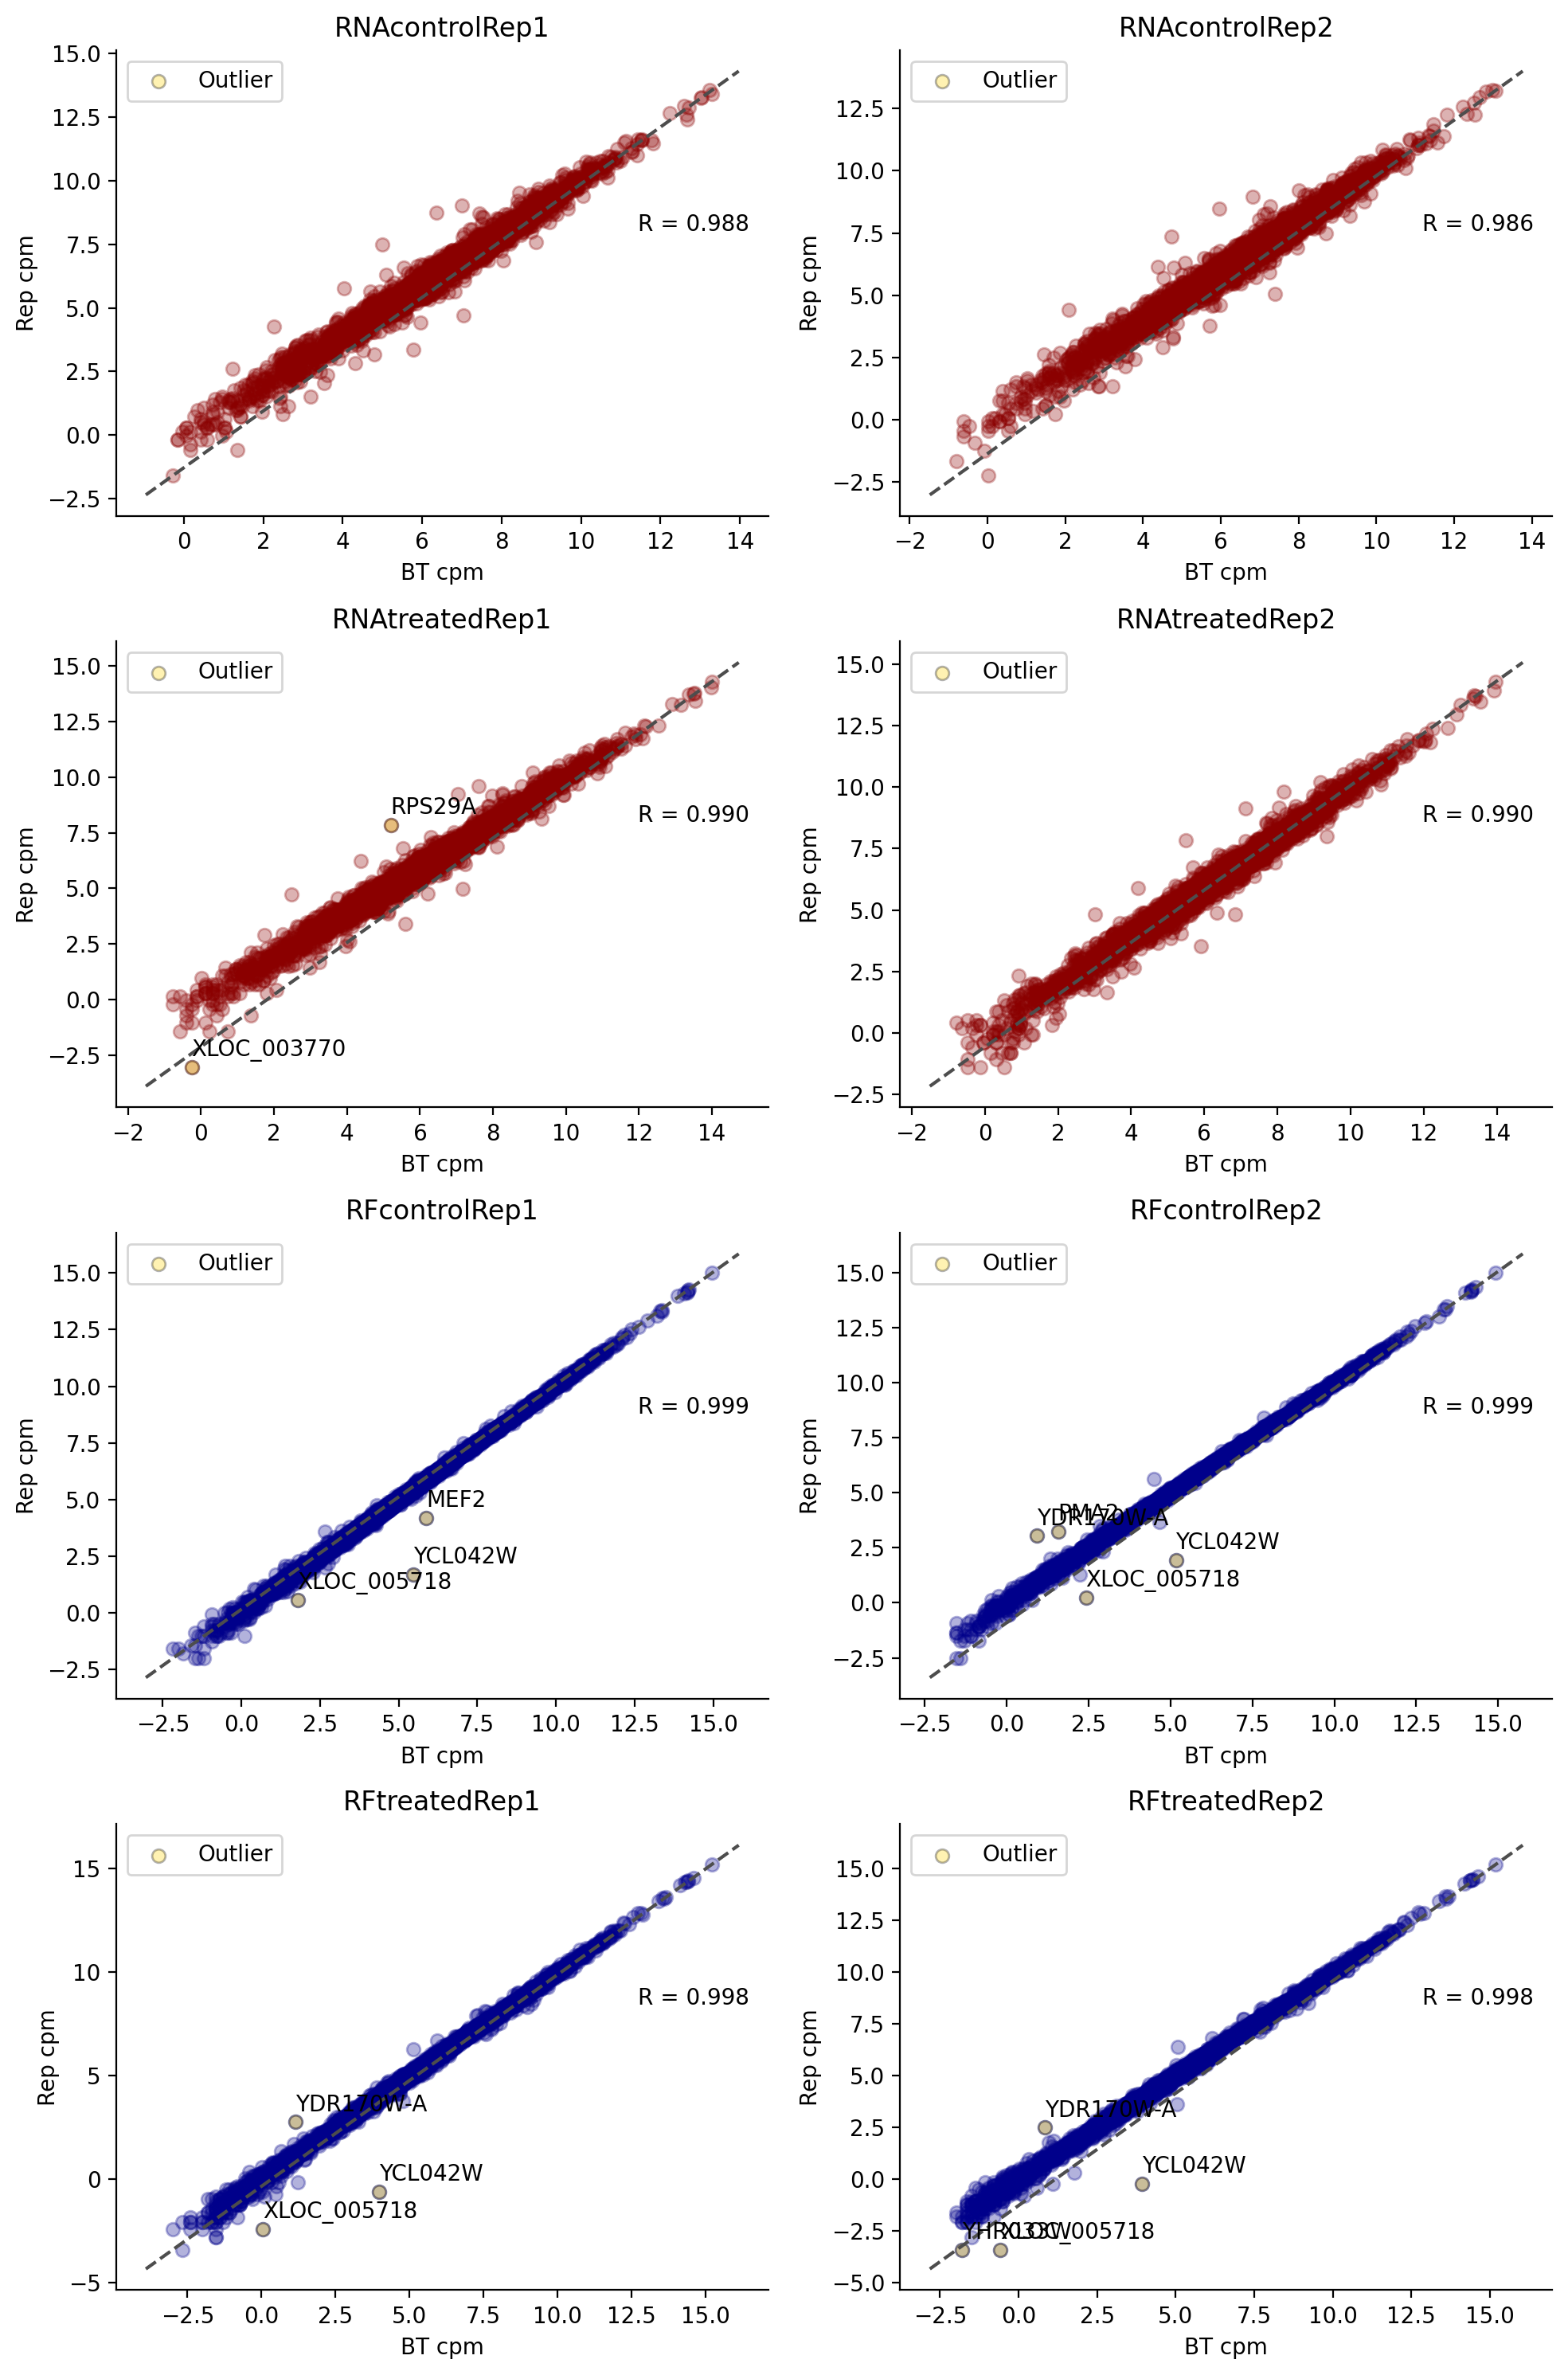

In [22]:
%config InlineBackend.figure_format = 'retina'

fig, axs = plt.subplots(4, 2, figsize=(10, 15))  # 2 rows, 4 columns

axs = axs.ravel()

conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']

colors = ['darkred', 'darkblue']

for i, cond in enumerate(conditions):
    # Select the subplot based on the condition index
    ax = axs[i]
    
    # Decide color based on the condition
    color = colors[0] if 'RNA' in cond else colors[1]

    corr_coef = np.corrcoef(sub_cpm_rep2[cond], cpm_bt[cond])[1][0]
    

    residuals = sub_cpm_rep2[cond] - cpm_bt[cond]
    threshold = np.mean(residuals) + 10*np.std(residuals)
    outliers = np.abs(residuals) > threshold
    
    # Plot the scatter plot for all points and highlight outliers
    ax.scatter(cpm_bt[cond], sub_cpm_rep2[cond], color=color, alpha=.3)
    ax.scatter(cpm_bt[cond][outliers], sub_cpm_rep2[cond][outliers], color='gold', edgecolor='black', label='Outlier', alpha=.3)
    
    # Annotate outliers with their gene names
    outlier_indices = np.where(outliers)[0]
    for index in outlier_indices:
        gene_name = sub_cpm_rep2.loc[sub_cpm_rep2.index[index], 'ID']
        ax.annotate(gene_name,
                    xy=(cpm_bt[cond].iloc[index], sub_cpm_rep2[cond].iloc[index]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='left',
                    fontsize=10)
    
    # Plot the identity line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    
    # Set the title, labels, and any other attributes
    ax.set_title(cond)
    ax.set_xlabel('BT cpm')
    ax.set_ylabel("Rep cpm")
    ax.spines[['top', 'right']].set_visible(False)

    # Add legend
    ax.legend()

    # Annotate the correlation coefficient
    ax.text(0.8, 0.65, f'R = {corr_coef:.3f}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top')


# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


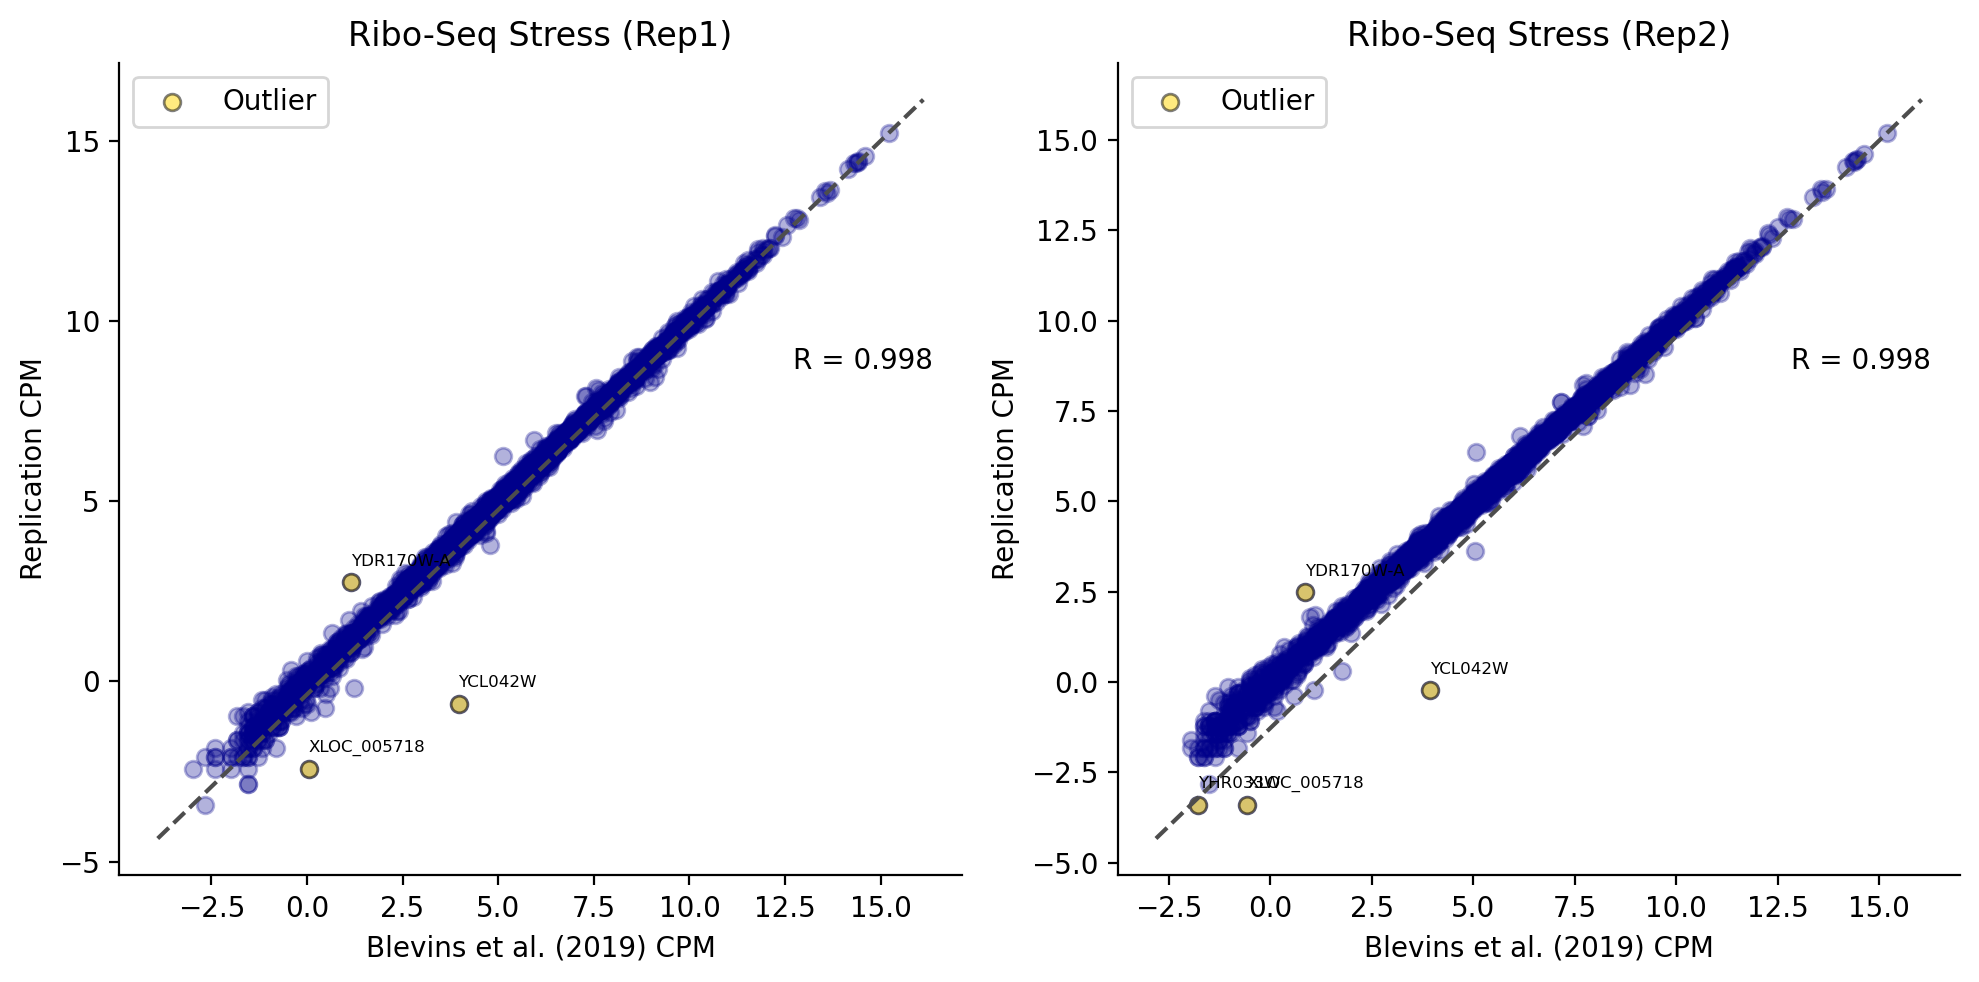

In [396]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 2 rows, 4 columns

axs = axs.ravel()

conditions = ['RFtreatedRep1', 'RFtreatedRep2']
names = ['Ribo-Seq Stress (Rep1)', 'Ribo-Seq Stress (Rep2)']

# conditions = [
#     'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
#     'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


colors = ['darkred', 'darkblue']

name_cond = zip(names, conditions)

for i, (name, cond) in enumerate(name_cond):
    ax = axs[i]
    color = colors[0] if 'RNA' in cond else colors[1]

    corr_coef = np.corrcoef(sub_cpm_rep2[cond], cpm_bt[cond])[1][0]
    
    residuals = sub_cpm_rep2[cond] - cpm_bt[cond]
    threshold = np.mean(residuals) + 10*np.std(residuals)
    outliers = np.abs(residuals) > threshold
    
    
    ax.scatter(cpm_bt[cond], sub_cpm_rep2[cond], color=color, alpha=.3)
    ax.scatter(cpm_bt[cond][outliers], sub_cpm_rep2[cond][outliers], color='gold', edgecolor='black', label='Outlier', alpha=.5)
    
    # Annotate outliers with their gene names
    outlier_indices = np.where(outliers)[0]
    for index in outlier_indices:
        gene_name = sub_cpm_rep2.loc[sub_cpm_rep2.index[index], 'ID']
        ax.annotate(gene_name,
                    xy=(cpm_bt[cond].iloc[index], sub_cpm_rep2[cond].iloc[index]),
                    xytext=(0, 6),
                    textcoords='offset points',
                    ha='left',
                    fontsize=6)
    
    # Plot the identity line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    
    ax.set_title(name)
    ax.set_xlabel('Blevins et al. (2019) CPM')
    ax.set_ylabel("Replication CPM")
    ax.spines[['top', 'right']].set_visible(False)
    
    # Annotate the correlation coefficient
    ax.text(0.8, 0.65, f'R = {corr_coef:.3f}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top')
    
    ax.legend()

plt.tight_layout()
plt.show()


In [439]:
c=0
for i,j in zip(sub_cpm_rep2['ID'], cpm_bt["ID"]):
    if i != j: c+=1 
print(c)

0


In [444]:
outliers_dict = {}

conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']

for cond in conditions:
    # Calculate residuals
    residuals = sub_cpm_rep2[cond] - cpm_bt[cond]
    
    # Determine the threshold for outliers
    threshold = np.mean(residuals) + 5*np.std(residuals)
    
    # Get a boolean mask where outliers are marked as True
    outliers_mask = np.abs(residuals) > threshold
    
    # Extract the IDs of the outliers
    outlier_ids = sub_cpm_rep2[cond][outliers_mask].index.tolist()
    outlier_genes = sub_cpm_rep2['ID'].iloc[outlier_ids]
    
    # Store the outlier IDs in the dictionary
    outliers_dict[cond] = outlier_genes


In [445]:
conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']

for cond in conditions:
    # Calculate corrs
    print(cond)
    print('R =', round(np.corrcoef(cpm_bt[cond], sub_cpm_rep2[cond])[1][0], 3))
    print()

RNAcontrolRep1
R = 0.988

RNAcontrolRep2
R = 0.986

RNAtreatedRep1
R = 0.99

RNAtreatedRep2
R = 0.99

RFcontrolRep1
R = 0.999

RFcontrolRep2
R = 0.999

RFtreatedRep1
R = 0.998

RFtreatedRep2
R = 0.998



In [446]:
print(outliers_dict['RNAcontrolRep1'][:5], "\nlength: ", len(outliers_dict['RNAcontrolRep1']))
print("\n")
print(outliers_dict['RNAcontrolRep2'][:5], "\nlength", len(outliers_dict['RNAcontrolRep2']))

325      ATP17
2124      MHF2
3310    RPL14A
3359     RPL39
3444    RPS29A
Name: ID, dtype: object 
length:  19


325      ATP17
1136      ERI1
2124      MHF2
3310    RPL14A
3359     RPL39
Name: ID, dtype: object 
length 17


In [447]:
rna_control_outliers = np.intersect1d(outliers_dict['RNAcontrolRep2'], outliers_dict['RNAcontrolRep1'])
rna_treated_outliers = np.intersect1d(outliers_dict['RNAtreatedRep1'], outliers_dict['RNAtreatedRep2'])
rna_outliers = np.intersect1d(rna_control_outliers, rna_treated_outliers)
rna_outliers

array(['MHF2', 'RPL14A', 'RPL39', 'RPS29A', 'SBH1', 'TMA7', 'TOM7',
       'VMA9', 'YKL044W', 'YPR010C-A'], dtype=object)

In [448]:
ribo_control_outliers = np.intersect1d(outliers_dict['RFcontrolRep2'], outliers_dict['RFcontrolRep1'])
ribo_treated_outliers = np.intersect1d(outliers_dict['RFtreatedRep1'], outliers_dict['RFtreatedRep2'])
ribo_outliers = np.intersect1d(ribo_control_outliers, ribo_treated_outliers)
ribo_outliers

array(['MEF2', 'XLOC_005718', 'YCL042W', 'YDR170W-A'], dtype=object)

In [449]:
df = pd.DataFrame()
df['Outliers (both Ribo-Seq & RNA-Seq)'] = np.intersect1d(rna_outliers, ribo_outliers)
df

,Outliers (both Ribo-Seq & RNA-Seq)


In [450]:
cpm_bt[cpm_bt['ID'] == 'RPL41A']

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
3362,RPL41A,7.76851,7.882122,3.300524,3.584457,0.96478,-0.79175,0.813892,1.108123


In [451]:
sub_cpm_rep2[sub_cpm_rep2['ID'] == 'RPL41A']

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
3362,RPL41A,8.108083,8.007071,3.35099,3.763235,-0.012193,-1.658437,0.676852,0.186527


## Parameters: intersection-strict, min quality 0

In [23]:
Ribo_stress_rep1 = pd.read_csv('all_count_files_strict_0/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']

Ribo_stress_rep2 = pd.read_csv('all_count_files_strict_0/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']

Ribo_normal_rep1 = pd.read_csv('all_count_files_strict_0/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']

Ribo_normal_rep2 = pd.read_csv('all_count_files_strict_0/quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']

ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')

In [24]:
RNA_stress_rep1 = pd.read_csv('all_count_files_strict_0/quality_thresh_0_SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']

RNA_stress_rep2 = pd.read_csv('all_count_files_strict_0/quality_thresh_0_SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']

RNA_normal_rep1 = pd.read_csv('all_count_files_strict_0/quality_thresh_0_SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']

RNA_normal_rep2 = pd.read_csv('all_count_files_strict_0/quality_thresh_0_SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']

rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')

In [25]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')

In [26]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)

all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]

all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2',
                                    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']

all_merged_cleaned.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,59,63,26,24,131,110,90,91
1,AAC3,616,629,595,599,229,281,236,318
2,AAD10,7,9,0,0,270,296,142,154
3,AAD14,47,42,14,16,445,587,251,336
4,AAD15,1,2,0,0,25,19,18,13


In [27]:
BT_counts = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_tableofcounts (3).txt', delimiter='\t')
print('     Blevins et al. (2019): ')
BT_counts['ID'] = [x.strip() for x in BT_counts['ID']]

BT_counts.head()

     Blevins et al. (2019): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,76,80,31,30,206,178,115,165
1,AAC3,950,964,842,801,418,516,428,524
2,AAD14,61,46,13,16,557,683,298,414
3,AAD4,22,22,11,13,537,691,326,458
4,AAD6,44,52,40,31,615,636,187,210


In [28]:
BT_counts.sum(axis=0)

ID                AAC1AAC3AAD14AAD4AAD6AAH1AAP1AAR2AAT1AAT2ABD1A...
RFcontrolRep1                                              36244107
RFcontrolRep2                                              34423447
RFtreatedRep1                                              31767841
RFtreatedRep2                                              31177590
RNAcontrolRep1                                             13321273
RNAcontrolRep2                                             13849389
RNAtreatedRep1                                             11945746
RNAtreatedRep2                                             15308609
dtype: object

In [29]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              30352508
RFcontrolRep2                                              28972748
RFtreatedRep1                                              27311968
RFtreatedRep2                                              26976163
RNAcontrolRep1                                              9806577
RNAcontrolRep2                                             10349764
RNAtreatedRep1                                              9046908
RNAtreatedRep2                                             11471152
dtype: object

In [30]:
print(len(all_merged_cleaned['ID']))
print(len(BT_counts['ID']))

7032
5419


In [31]:
print(len(all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])]))

subset_all_merged_cleaned = all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])].reset_index()

5419


In [32]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              30352508
RFcontrolRep2                                              28972748
RFtreatedRep1                                              27311968
RFtreatedRep2                                              26976163
RNAcontrolRep1                                              9806577
RNAcontrolRep2                                             10349764
RNAtreatedRep1                                              9046908
RNAtreatedRep2                                             11471152
dtype: object

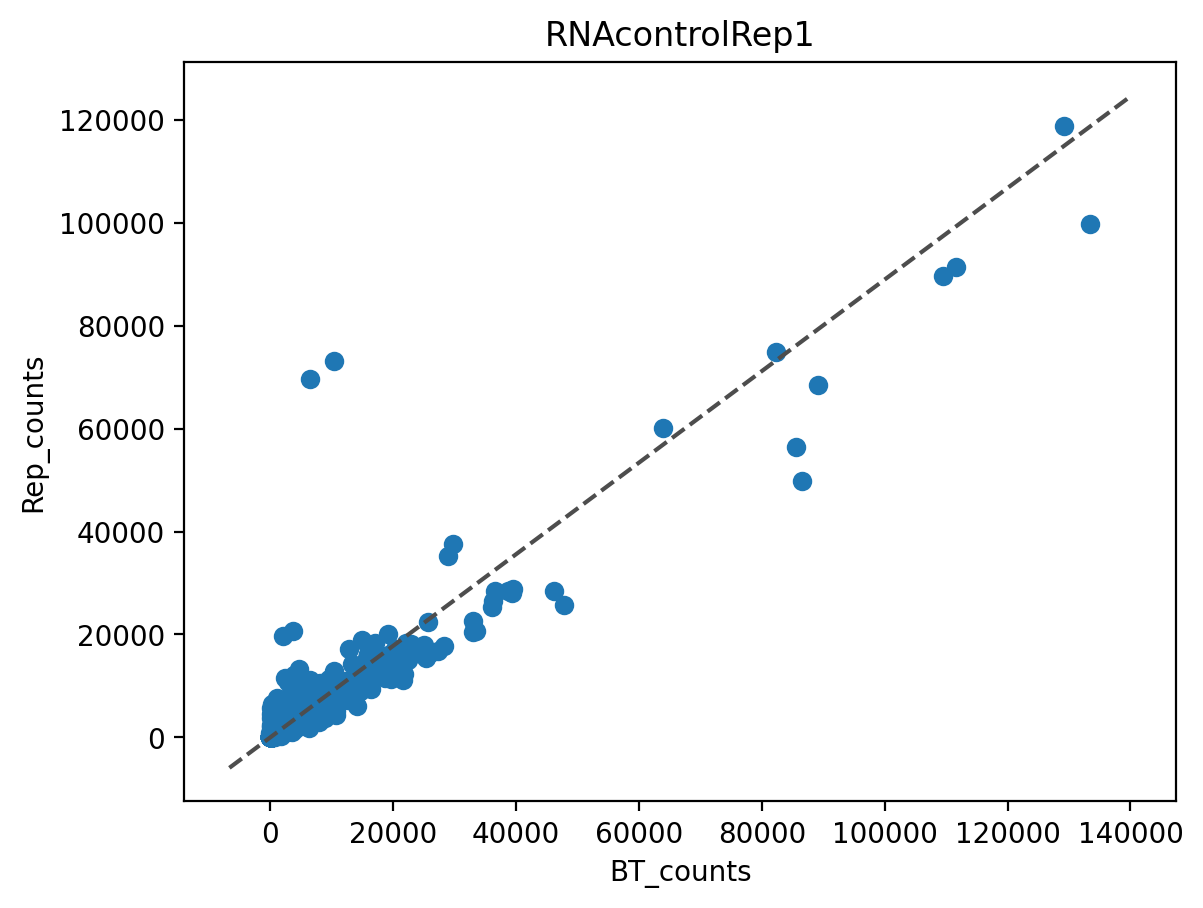

In [33]:
conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


for cond in conditions:
    plt.scatter(BT_counts[cond], subset_all_merged_cleaned[cond])
    
    plt.xlabel('BT_counts')
    plt.ylabel("Rep_counts")
    plt.title(cond)
    
    plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
    
    plt.show()
    
    break

In [34]:
def calculate_log2_cpm(df):
    # Sum the counts for each sample (column-wise)
    total_counts = df.sum(axis=0)
    
    # Calculate CPM
    cpm = (df / total_counts) * 1e6
    
    # Replace any zeroes with a small value to avoid log(0)
    cpm.replace(0, 1e-10, inplace=True)
    
    # Calculate the log2 CPM
    log2_cpm = np.log2(cpm)
    
    return log2_cpm


# Sum the counts for each sample (column-wise)
# Calculate CPM
# Calculate the log2 CPM



In [35]:
cpm_bt = calculate_log2_cpm(BT_counts.set_index('ID')).reset_index()

In [36]:
cpm_bt.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,1.068253,1.216608,-0.035299,-0.055547,3.950840,3.683983,3.267065,3.430051
1,AAC3,4.712109,4.807570,4.728181,4.683221,4.971699,5.219477,5.163042,5.097152
2,AAD14,0.751063,0.418242,-1.289055,-0.962438,5.385873,5.623991,4.640743,4.757216
3,AAD4,-0.720243,-0.645888,-1.530064,-1.261998,5.333118,5.640791,4.770303,4.902932
4,AAD6,0.279757,0.595120,0.332433,-0.008241,5.528783,5.521133,3.968469,3.777974


In [37]:
cpm_bt.columns

Index(['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1',
       'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1',
       'RNAtreatedRep2'],
      dtype='object')

In [38]:
cpm_rep2 = calculate_log2_cpm(all_merged_cleaned.set_index('ID')).reset_index()

In [39]:
cpm_rep2.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,0.958899,1.120655,-0.071022,-0.168651,3.739673,3.409834,3.314428,2.987856
1,AAC3,4.343043,4.440292,4.445284,4.472799,4.545454,4.762900,4.705218,4.792945
2,AAD10,-2.116389,-1.686700,-33.219281,-33.219281,4.783066,4.837927,3.972322,3.746848
3,AAD14,0.630845,0.535693,-0.964106,-0.753613,5.503912,5.825691,4.794119,4.872379
4,AAD15,-4.923744,-3.856625,-33.219281,-33.219281,1.350107,0.876402,0.992500,0.180501


In [40]:
print(len(cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]))

sub_cpm_rep2 = cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]

5419


In [41]:
sub_cpm_rep2 = sub_cpm_rep2.reset_index(drop='True')
cpm_bt = cpm_bt.reset_index(drop='True')

print(len( np.intersect1d(sub_cpm_rep2['ID'], cpm_bt['ID']) ))
print(len( sub_cpm_rep2['RFcontrolRep1'] - cpm_bt['RFcontrolRep1'] ))

5419
5419


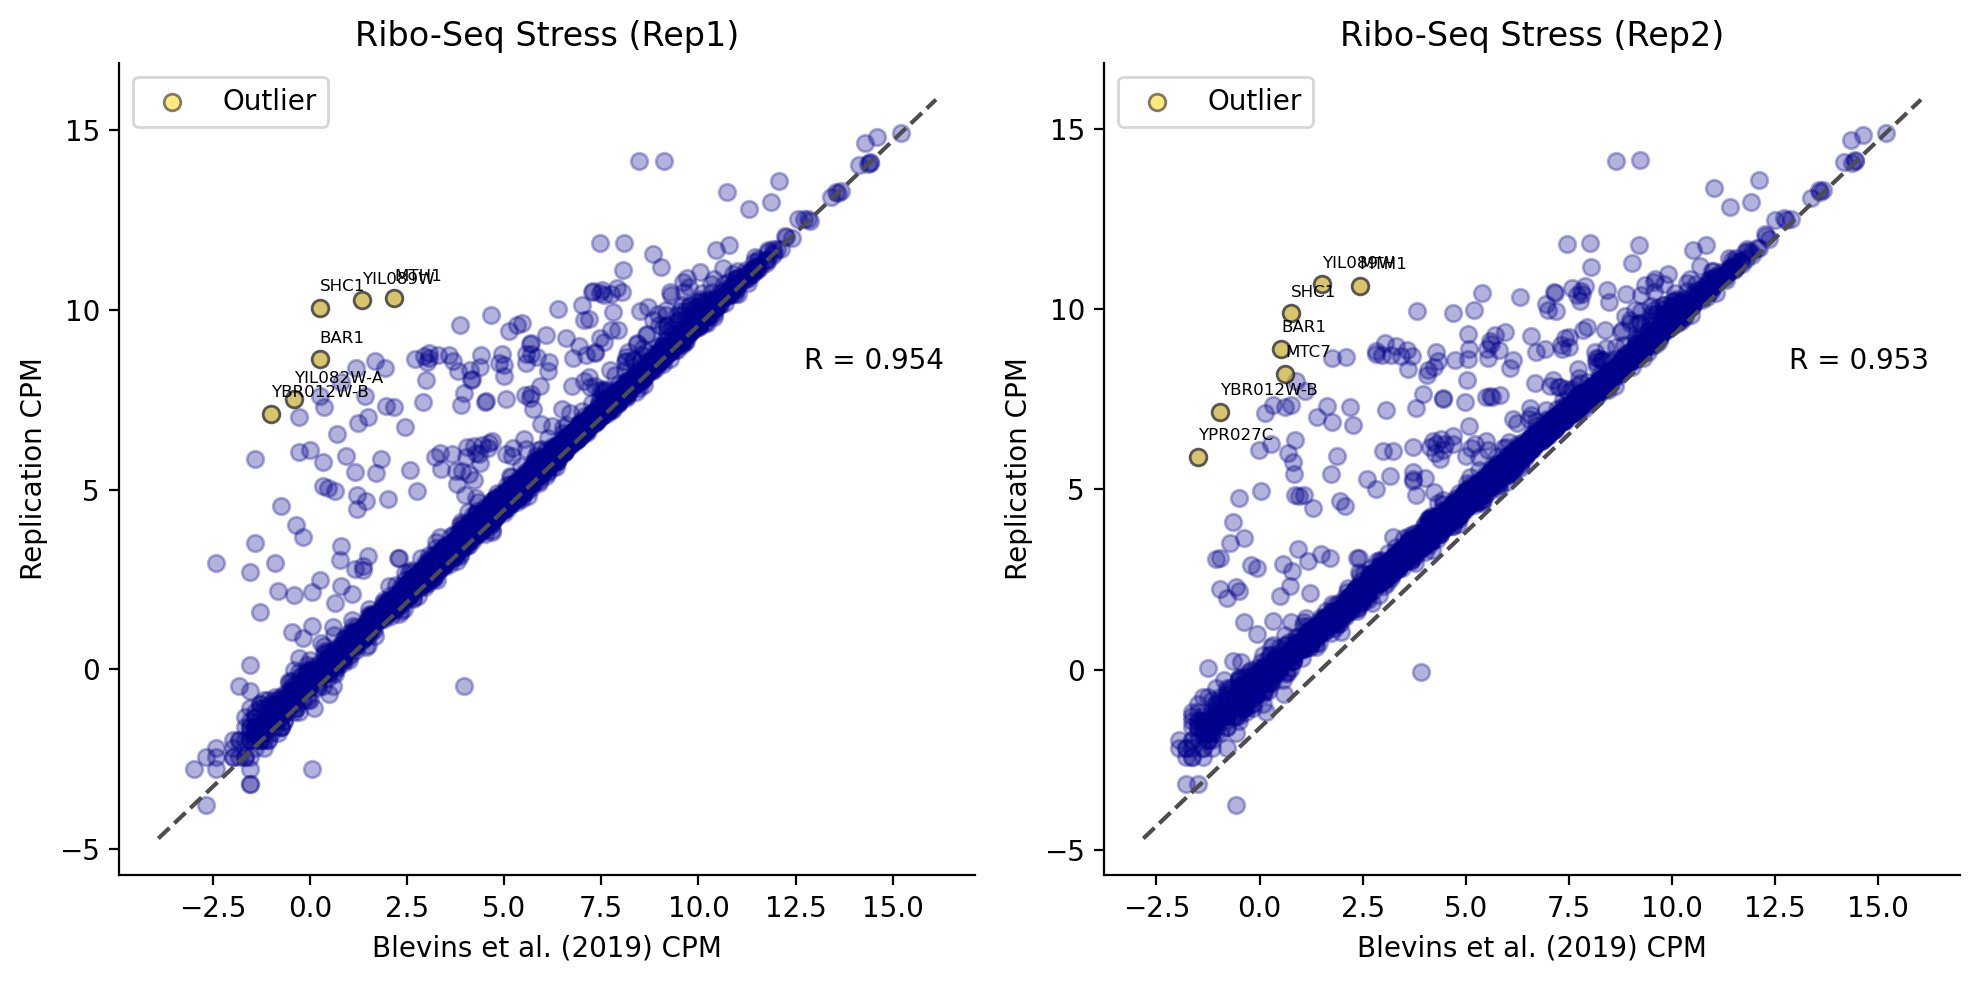

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 2 rows, 4 columns

axs = axs.ravel()


# conditions = ['RNAcontrolRep1', 'RNAcontrolRep2']
# names = ['RNA-Seq WT (Rep1)', 'RNA-Seq WT (Rep2)']

# conditions = ['RNAtreatedRep1', 'RNAtreatedRep2']
# names = ['RNA-Seq Stress (Rep1)', 'RNA-Seq Stress (Rep2)']

# conditions = ['RFcontrolRep1', 'RFcontrolRep2']
# names = ['Ribo-Seq WT (Rep1)', 'Ribo-Seq WT (Rep2)']


conditions = ['RFtreatedRep1', 'RFtreatedRep2']
names = ['Ribo-Seq Stress (Rep1)', 'Ribo-Seq Stress (Rep2)']

# conditions = [
#     'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
#     'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


colors = ['darkred', 'darkblue']

name_cond = zip(names, conditions)

for i, (name, cond) in enumerate(name_cond):
    ax = axs[i]
    color = colors[0] if 'RNA' in cond else colors[1]

    corr_coef = np.corrcoef(sub_cpm_rep2[cond], cpm_bt[cond])[1][0]
    
    residuals = sub_cpm_rep2[cond] - cpm_bt[cond]
    threshold = np.mean(residuals) + 10*np.std(residuals)
    outliers = np.abs(residuals) > threshold
    
    
    ax.scatter(cpm_bt[cond], sub_cpm_rep2[cond], color=color, alpha=.3)
    ax.scatter(cpm_bt[cond][outliers], sub_cpm_rep2[cond][outliers], color='gold', edgecolor='black', label='Outlier', alpha=.5)
    
    # Annotate outliers with their gene names
    outlier_indices = np.where(outliers)[0]
    for index in outlier_indices:
        gene_name = sub_cpm_rep2.loc[sub_cpm_rep2.index[index], 'ID']
        ax.annotate(gene_name,
                    xy=(cpm_bt[cond].iloc[index], sub_cpm_rep2[cond].iloc[index]),
                    xytext=(0, 6),
                    textcoords='offset points',
                    ha='left',
                    fontsize=6)
    
    # Plot the identity line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    
    ax.set_title(name)
    ax.set_xlabel('Blevins et al. (2019) CPM')
    ax.set_ylabel("Replication CPM")
    ax.spines[['top', 'right']].set_visible(False)
    
    # Annotate the correlation coefficient
    ax.text(0.8, 0.65, f'R = {corr_coef:.3f}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top')
    
    ax.legend()

plt.tight_layout()
plt.show()


## Parameters: union, min quality 0

In [51]:
Ribo_stress_rep1 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761667_full.txt', delimiter='\t', header=None)
Ribo_stress_rep1.columns = ['ID', 'ribo_stress_rep1']

Ribo_stress_rep2 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761668_full.txt', delimiter='\t', header=None)
Ribo_stress_rep2.columns = ['ID', 'ribo_stress_rep2']

Ribo_normal_rep1 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761669_full.txt', delimiter='\t', header=None)
Ribo_normal_rep1.columns = ['ID', 'ribo_normal_rep1']

Ribo_normal_rep2 = pd.read_csv('all_count_files/union_quality_threshold_0_yes_stranded_Blevins_Tavella_gtf_counts_SRR6761670_full.txt', delimiter='\t', header=None)
Ribo_normal_rep2.columns = ['ID', 'ribo_normal_rep2']

ribo_merged = Ribo_normal_rep1.merge(Ribo_normal_rep2, on='ID').merge(Ribo_stress_rep1, on='ID').merge(Ribo_stress_rep2, on='ID')

In [54]:
RNA_stress_rep1 = pd.read_csv('all_count_files/union_thesh_0_SRR6761663_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep1.columns = ['ID', 'rna_stress_rep1']

RNA_stress_rep2 = pd.read_csv('all_count_files/union_thesh_0_SRR6761664_gene_counts.txt', delimiter='\t', header=None)
RNA_stress_rep2.columns = ['ID', 'rna_stress_rep2']

RNA_normal_rep1 = pd.read_csv('all_count_files/union_thesh_0_SRR6761665_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep1.columns = ['ID', 'rna_normal_rep1']

RNA_normal_rep2 = pd.read_csv('all_count_files/union_thesh_0_SRR6761666_gene_counts.txt', delimiter='\t', header=None)
RNA_normal_rep2.columns = ['ID', 'rna_normal_rep2']

rna_merged = RNA_normal_rep1.merge(RNA_normal_rep2, on='ID').merge(RNA_stress_rep1, on='ID').merge(RNA_stress_rep2, on='ID')

In [55]:
all_merged = ribo_merged.merge(rna_merged, on = 'ID')

In [56]:
all_merged_cleaned = all_merged.drop(index=[0,1,7034, 7035, 7036,7037,7038]).reset_index(drop=True)

all_merged_cleaned['ID'] = [x.strip() for x in all_merged_cleaned['ID']]

all_merged_cleaned.columns = ['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2',
                                    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2']

all_merged_cleaned.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,60,67,27,24,153,135,104,122
1,AAC3,666,706,621,630,279,325,276,375
2,AAD10,7,9,0,0,295,325,153,180
3,AAD14,49,44,14,16,545,703,286,390
4,AAD15,2,3,0,0,69,52,42,44


In [57]:
BT_counts = pd.read_csv('/Users/scampione/Downloads/Blevins_Tavella_etal_tableofcounts (3).txt', delimiter='\t')
print('     Blevins et al. (2019): ')
BT_counts['ID'] = [x.strip() for x in BT_counts['ID']]

BT_counts.head()

     Blevins et al. (2019): 


,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,76,80,31,30,206,178,115,165
1,AAC3,950,964,842,801,418,516,428,524
2,AAD14,61,46,13,16,557,683,298,414
3,AAD4,22,22,11,13,537,691,326,458
4,AAD6,44,52,40,31,615,636,187,210


In [58]:
BT_counts.sum(axis=0)

ID                AAC1AAC3AAD14AAD4AAD6AAH1AAP1AAR2AAT1AAT2ABD1A...
RFcontrolRep1                                              36244107
RFcontrolRep2                                              34423447
RFtreatedRep1                                              31767841
RFtreatedRep2                                              31177590
RNAcontrolRep1                                             13321273
RNAcontrolRep2                                             13849389
RNAtreatedRep1                                             11945746
RNAtreatedRep2                                             15308609
dtype: object

In [59]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              33663991
RFcontrolRep2                                              31902877
RFtreatedRep1                                              28798085
RFtreatedRep2                                              28544324
RNAcontrolRep1                                             11954307
RNAcontrolRep2                                             12627044
RNAtreatedRep1                                             11109986
RNAtreatedRep2                                             14162002
dtype: object

In [60]:
print(len(all_merged_cleaned['ID']))
print(len(BT_counts['ID']))

7032
5419


In [61]:
print(len(all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])]))

subset_all_merged_cleaned = all_merged_cleaned[all_merged_cleaned['ID'].isin(BT_counts['ID'])].reset_index()

5419


In [62]:
all_merged_cleaned.sum(axis=0)

ID                AAC1AAC3AAD10AAD14AAD15AAD3AAD4AAD6AAH1AAP1AAR...
RFcontrolRep1                                              33663991
RFcontrolRep2                                              31902877
RFtreatedRep1                                              28798085
RFtreatedRep2                                              28544324
RNAcontrolRep1                                             11954307
RNAcontrolRep2                                             12627044
RNAtreatedRep1                                             11109986
RNAtreatedRep2                                             14162002
dtype: object

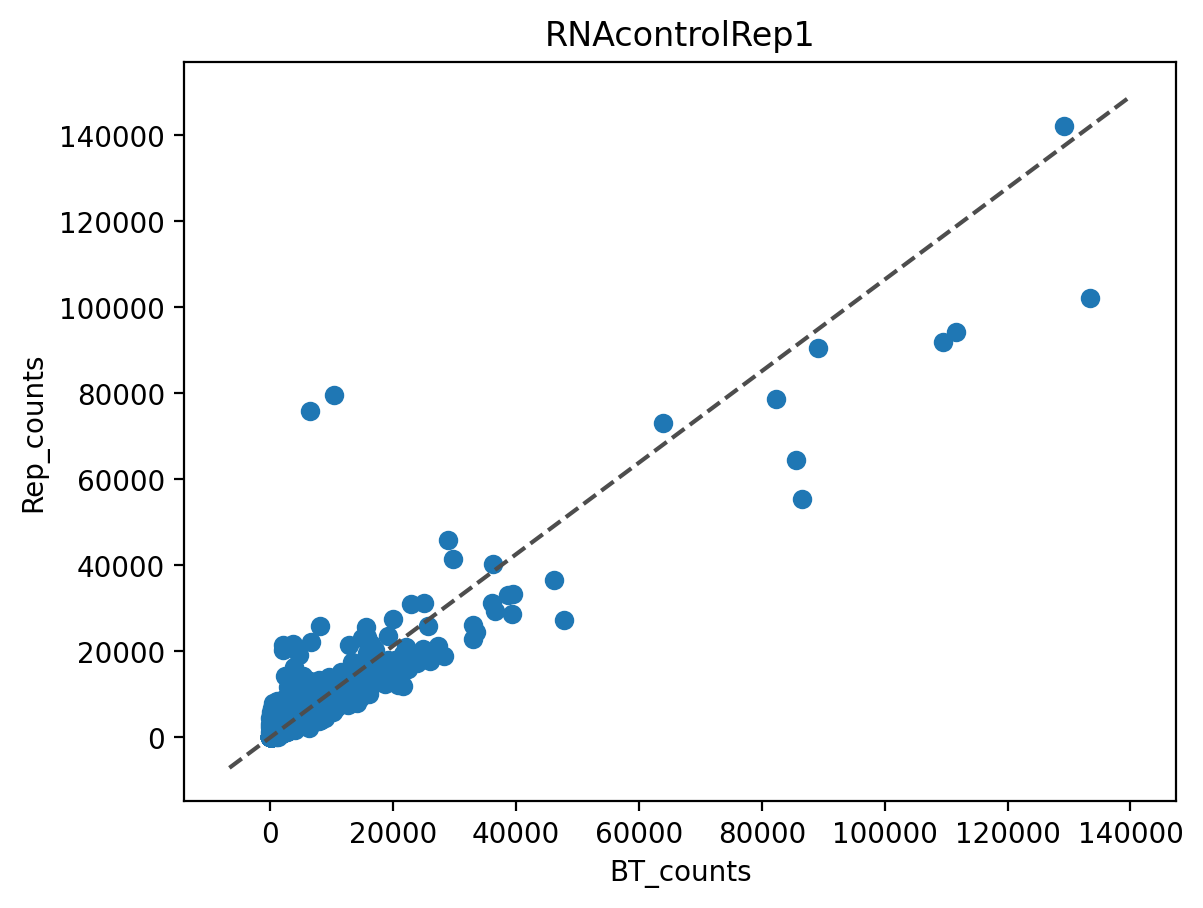

In [63]:
conditions = [
    'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
    'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


for cond in conditions:
    plt.scatter(BT_counts[cond], subset_all_merged_cleaned[cond])
    
    plt.xlabel('BT_counts')
    plt.ylabel("Rep_counts")
    plt.title(cond)
    
    plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
    
    plt.show()
    
    break

In [64]:
def calculate_log2_cpm(df):
    # Sum the counts for each sample (column-wise)
    total_counts = df.sum(axis=0)
    
    # Calculate CPM
    cpm = (df / total_counts) * 1e6
    
    # Replace any zeroes with a small value to avoid log(0)
    cpm.replace(0, 1e-10, inplace=True)
    
    # Calculate the log2 CPM
    log2_cpm = np.log2(cpm)
    
    return log2_cpm


# Sum the counts for each sample (column-wise)
# Calculate CPM
# Calculate the log2 CPM



In [65]:
cpm_bt = calculate_log2_cpm(BT_counts.set_index('ID')).reset_index()

In [66]:
cpm_bt.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,1.068253,1.216608,-0.035299,-0.055547,3.950840,3.683983,3.267065,3.430051
1,AAC3,4.712109,4.807570,4.728181,4.683221,4.971699,5.219477,5.163042,5.097152
2,AAD14,0.751063,0.418242,-1.289055,-0.962438,5.385873,5.623991,4.640743,4.757216
3,AAD4,-0.720243,-0.645888,-1.530064,-1.261998,5.333118,5.640791,4.770303,4.902932
4,AAD6,0.279757,0.595120,0.332433,-0.008241,5.528783,5.521133,3.968469,3.777974


In [67]:
cpm_bt.columns

Index(['ID', 'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1',
       'RFtreatedRep2', 'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1',
       'RNAtreatedRep2'],
      dtype='object')

In [69]:
cpm_rep2 = calculate_log2_cpm(all_merged_cleaned.set_index('ID')).reset_index()

In [70]:
cpm_rep2.head()

,ID,RFcontrolRep1,RFcontrolRep2,RFtreatedRep1,RFtreatedRep2,RNAcontrolRep1,RNAcontrolRep2,RNAtreatedRep1,RNAtreatedRep2
0,AAC1,0.833756,1.070475,-0.093013,-0.250169,3.677929,3.418371,3.226655,3.106784
1,AAC3,4.306244,4.467910,4.430548,4.464076,4.544663,4.685851,4.634739,4.726793
2,AAD10,-2.265779,-1.825690,-33.219281,-33.219281,4.625113,4.685851,3.783603,3.667900
3,AAD14,0.541576,0.463817,-1.040546,-0.835132,5.510654,5.798936,4.686086,4.783377
4,AAD15,-4.073134,-3.410652,-33.219281,-33.219281,2.529066,2.041995,1.918532,1.635478


In [71]:
print(len(cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]))

sub_cpm_rep2 = cpm_rep2[cpm_rep2['ID'].isin(cpm_bt['ID'])]

5419


In [72]:
sub_cpm_rep2 = sub_cpm_rep2.reset_index(drop='True')
cpm_bt = cpm_bt.reset_index(drop='True')

print(len( np.intersect1d(sub_cpm_rep2['ID'], cpm_bt['ID']) ))
print(len( sub_cpm_rep2['RFcontrolRep1'] - cpm_bt['RFcontrolRep1'] ))

5419
5419


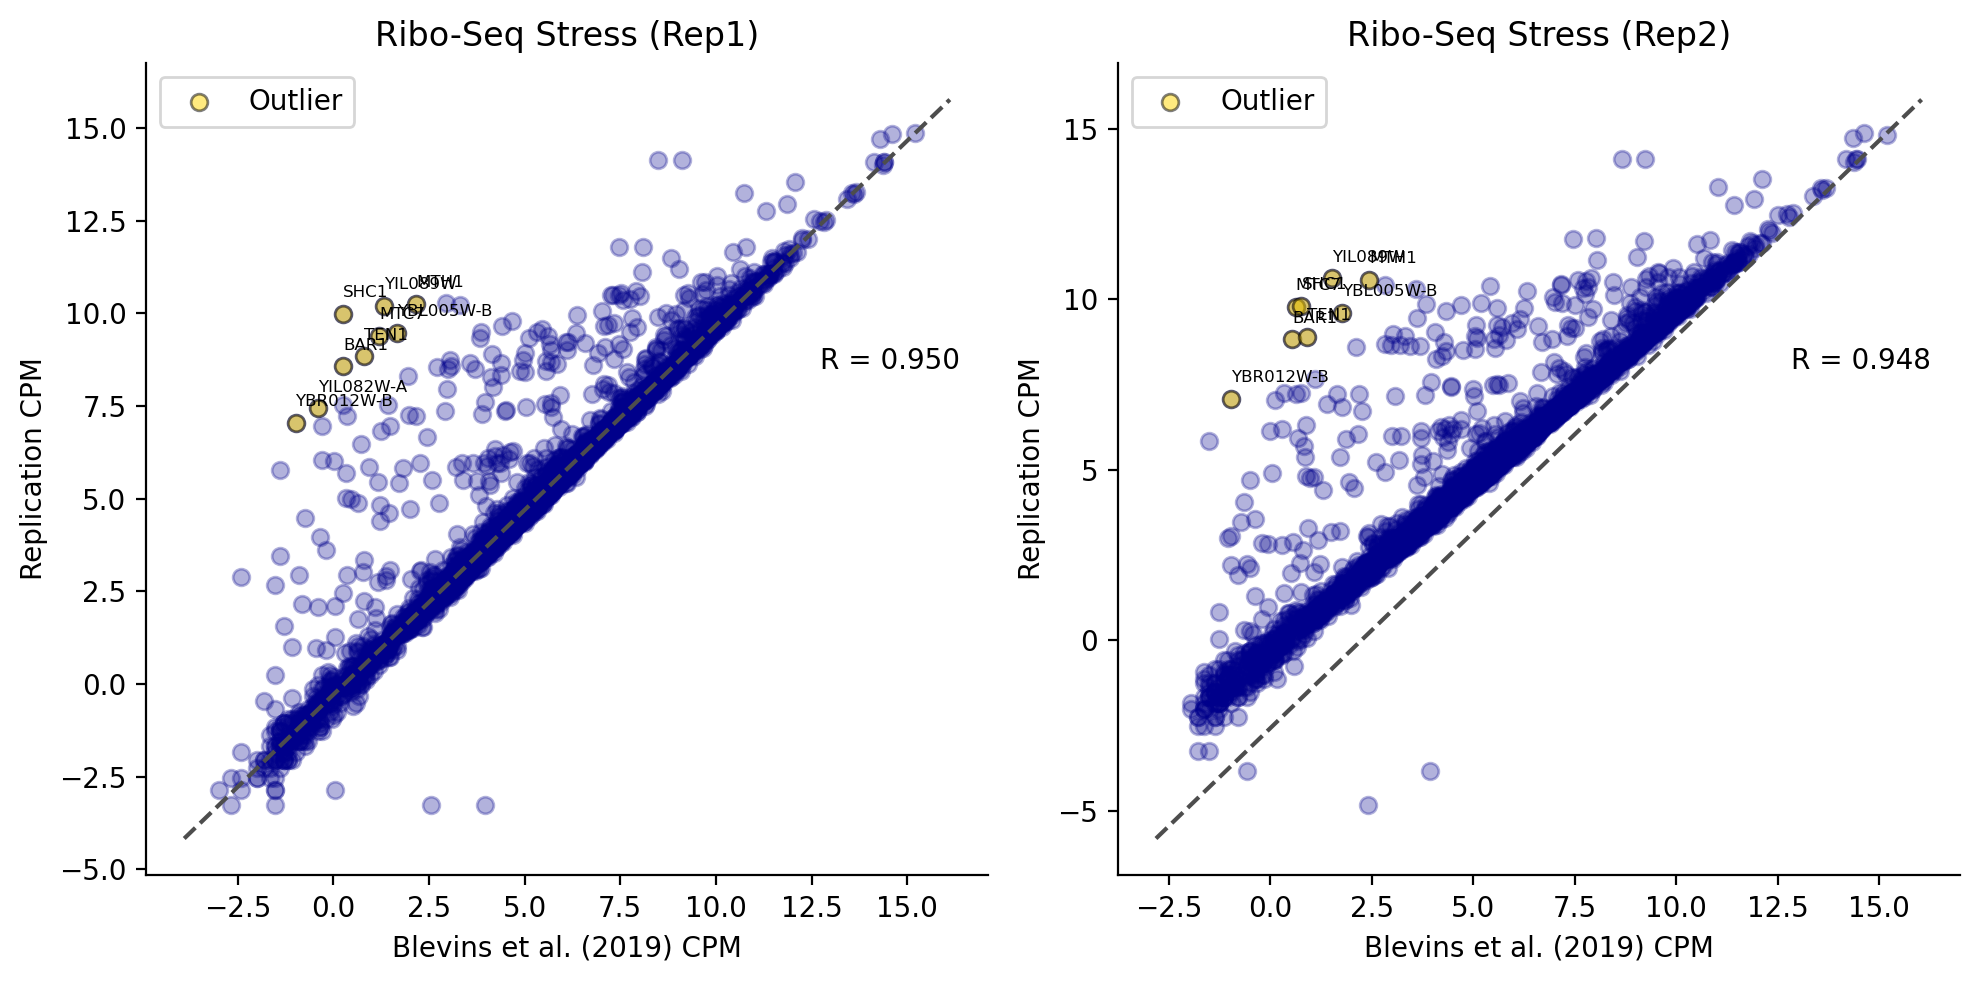

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 2 rows, 4 columns

axs = axs.ravel()


# conditions = ['RNAcontrolRep1', 'RNAcontrolRep2']
# names = ['RNA-Seq WT (Rep1)', 'RNA-Seq WT (Rep2)']

# conditions = ['RNAtreatedRep1', 'RNAtreatedRep2']
# names = ['RNA-Seq Stress (Rep1)', 'RNA-Seq Stress (Rep2)']

# conditions = ['RFcontrolRep1', 'RFcontrolRep2']
# names = ['Ribo-Seq WT (Rep1)', 'Ribo-Seq WT (Rep2)']


conditions = ['RFtreatedRep1', 'RFtreatedRep2']
names = ['Ribo-Seq Stress (Rep1)', 'Ribo-Seq Stress (Rep2)']

# conditions = [
#     'RNAcontrolRep1', 'RNAcontrolRep2', 'RNAtreatedRep1', 'RNAtreatedRep2',
#     'RFcontrolRep1', 'RFcontrolRep2', 'RFtreatedRep1', 'RFtreatedRep2']


colors = ['darkred', 'darkblue']

name_cond = zip(names, conditions)

for i, (name, cond) in enumerate(name_cond):
    ax = axs[i]
    color = colors[0] if 'RNA' in cond else colors[1]

    corr_coef = np.corrcoef(sub_cpm_rep2[cond], cpm_bt[cond])[1][0]
    
    residuals = sub_cpm_rep2[cond] - cpm_bt[cond]
    threshold = np.mean(residuals) + 10*np.std(residuals)
    outliers = np.abs(residuals) > threshold
    
    
    ax.scatter(cpm_bt[cond], sub_cpm_rep2[cond], color=color, alpha=.3)
    ax.scatter(cpm_bt[cond][outliers], sub_cpm_rep2[cond][outliers], color='gold', edgecolor='black', label='Outlier', alpha=.5)
    
    # Annotate outliers with their gene names
    outlier_indices = np.where(outliers)[0]
    for index in outlier_indices:
        gene_name = sub_cpm_rep2.loc[sub_cpm_rep2.index[index], 'ID']
        ax.annotate(gene_name,
                    xy=(cpm_bt[cond].iloc[index], sub_cpm_rep2[cond].iloc[index]),
                    xytext=(0, 6),
                    textcoords='offset points',
                    ha='left',
                    fontsize=6)
    
    # Plot the identity line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    
    ax.set_title(name)
    ax.set_xlabel('Blevins et al. (2019) CPM')
    ax.set_ylabel("Replication CPM")
    ax.spines[['top', 'right']].set_visible(False)
    
    # Annotate the correlation coefficient
    ax.text(0.8, 0.65, f'R = {corr_coef:.3f}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top')
    
    ax.legend()

plt.tight_layout()
plt.show()
